In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../../../estsoft/data/train.csv")

In [3]:
df_prod =df[df['is_consumption']==0]
df_cons = df[df['is_consumption']==1]

In [4]:
print(df_prod.isnull().sum())
print(df_cons.isnull().sum())

county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64
county                  0
is_business             0
product_type            0
target                264
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64


In [5]:
time_before = ['2022-10-30 02:00:00', '2022-03-27 02:00:00', '2023-03-26 02:00:00', '2021-10-31 02:00:00']
time = ['2022-10-30 03:00:00', '2022-03-27 03:00:00', '2023-03-26 03:00:00', '2021-10-31 03:00:00']
time_after = ['2022-10-30 04:00:00', '2022-03-27 04:00:00', '2023-03-26 04:00:00', '2021-10-31 04:00:00']

In [6]:
def fill_null(df:pd.DataFrame, time_before:list, time:list, time_after:list):
    df_fill = pd.DataFrame()
    for i in range(len(time_before)):
        df_null = df[df['datetime']==time[i]]
        df_concat = pd.concat([df[df['datetime']==time_before[i]], df[df['datetime']==time_after[i]]])

        # null값의 앞뒤 시간의 평균값 계산 및 저장
        ab_mean = pd.DataFrame(df_concat.groupby(['prediction_unit_id'])['target'].sum()/2).reset_index()
        df_merge = pd.merge(df_null, ab_mean, how='left', on='prediction_unit_id').drop(columns='target_x').rename(columns={'target_y':'target'})
        df_fill = pd.concat([df_fill, df_merge])

        # null값이 있는 행 drop
        df = df.drop(df_null.index)

    df = pd.concat([df, df_fill])
    return df

In [7]:
df_prod = fill_null(df_prod, time_before, time, time_after)
print(df_prod.isnull().sum())
df_prod

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id         0
row_id                0
prediction_unit_id    0
dtype: int64


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
8,0,1,1,0.000,0,2021-09-01 00:00:00,0,8,4
...,...,...,...,...,...,...,...,...,...
58,14,1,3,9.645,0,2021-10-31 03:00:00,60,179054,56
59,15,0,1,0.000,0,2021-10-31 03:00:00,60,179056,57
60,15,0,3,3.453,0,2021-10-31 03:00:00,60,179058,58
61,15,1,1,0.000,0,2021-10-31 03:00:00,60,179060,59


In [8]:
df_cons = fill_null(df_cons, time_before, time, time_after)
print(df_cons.isnull().sum())
df_cons

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id         0
row_id                0
prediction_unit_id    0
dtype: int64


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1,0,0,1,96.5900,1,2021-09-01 00:00:00,0,1,0
3,0,0,2,17.3140,1,2021-09-01 00:00:00,0,3,1
5,0,0,3,656.8590,1,2021-09-01 00:00:00,0,5,2
7,0,1,0,59.0000,1,2021-09-01 00:00:00,0,7,3
9,0,1,1,501.7600,1,2021-09-01 00:00:00,0,9,4
...,...,...,...,...,...,...,...,...,...
58,14,1,3,904.3165,1,2021-10-31 03:00:00,60,179055,56
59,15,0,1,11.2895,1,2021-10-31 03:00:00,60,179057,57
60,15,0,3,79.4285,1,2021-10-31 03:00:00,60,179059,58
61,15,1,1,34.7425,1,2021-10-31 03:00:00,60,179061,59


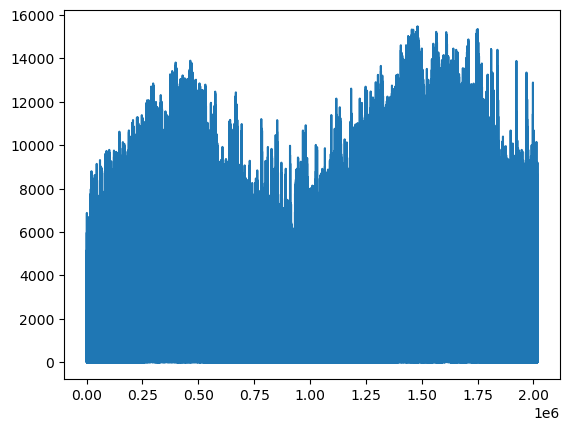

In [9]:
plt.plot(df[df['is_consumption']==1]['target'])

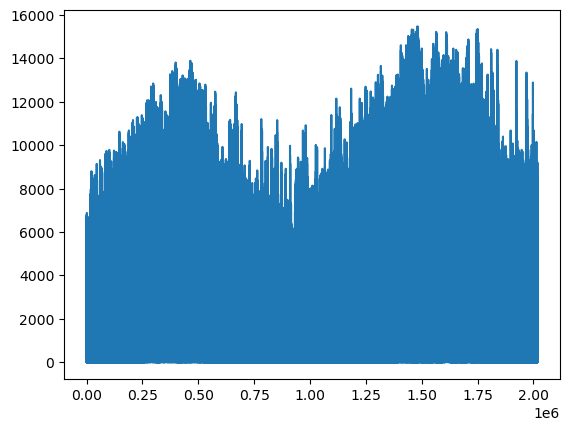

In [10]:
plt.plot(df_cons[df_cons['is_consumption']==1]['target'])

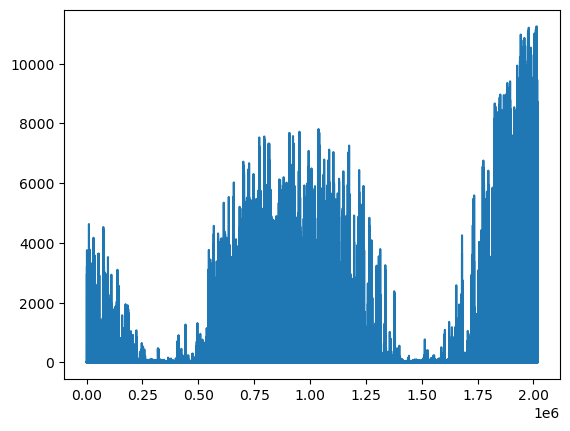

In [11]:
plt.plot(df[df['is_consumption']==0]['target'])

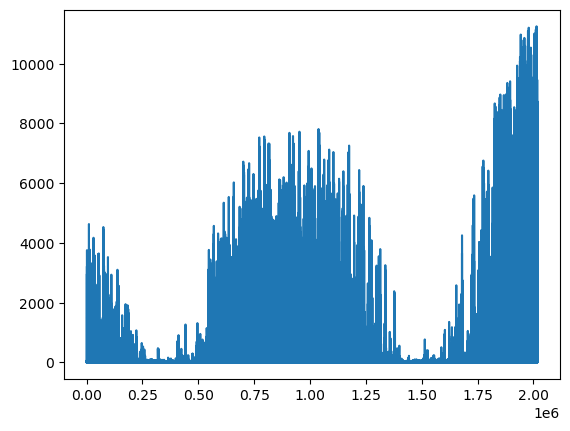

In [12]:
plt.plot(df_prod[df_prod['is_consumption']==0]['target'])

In [13]:
df1 = df_prod[df_prod['datetime']==time_before[0]]
df2 = df_prod[df_prod['datetime']==time[0]]
df3 = df_prod[df_prod['datetime']==time_after[0]]

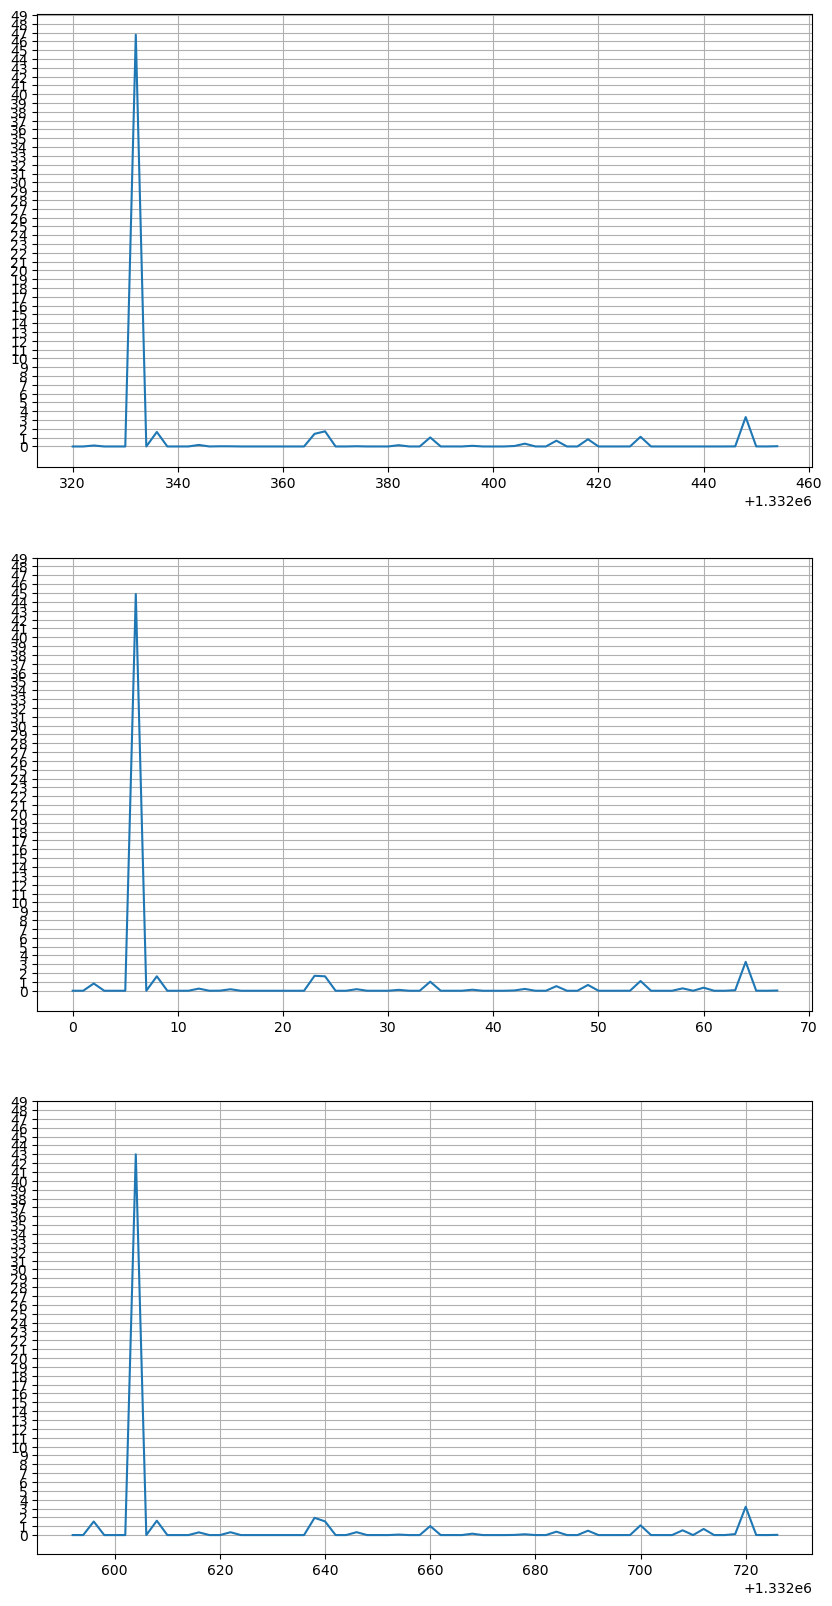

In [14]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot(df1['target'])
plt.yticks(range(0,50))
plt.grid()

plt.subplot(3,1,2)
plt.plot(df2['target'])
plt.yticks(range(0,50))
plt.grid()

plt.subplot(3,1,3)
plt.plot(df3['target'])
plt.yticks(range(0,50))
plt.grid()